In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Open file
file = open('day8_input.txt', 'r')
raw_data  = file.read()
raw_data = raw_data[:-1] #strip training \n
#Convert to array of int
data = []
for i in raw_data:
    data.append(int(i))
data = np.array(data)

In [3]:
#Split into layers
#Don't care about shape right now so just split to n arrays of len width*height
width = 25
height = 6
layer_size = width * height
num_layers  = int(len(data) / (layer_size))
shape = [num_layers, layer_size]

data = np.reshape(data, shape)

In [4]:
#Count zeros
#Save layer is smallest number of zeros
zeros = [layer_size, -1]
for i in range(0, len(data)):
    layer_zeros = len(np.where(data[i]==0)[0])
    if layer_zeros < zeros[0]:
        zeros[0] = layer_zeros
        zeros[1] = i

In [5]:
#Calculate number of 1s and 2s and multiply the result
ones = len(np.where(data[zeros[1]]==1)[0])
twos = len(np.where(data[zeros[1]]==2)[0])
print('Part 1 Solution:', ones*twos)

Part 1 Solution: 1548


In [6]:
#For transparent pixes, allow the layer below to be shown
#0 = black
#1 = white
#2 = tranparent
image = np.ones(width*height, dtype=np.int) * 2
for layer in data:
    trans = np.where(image==2) #Get transparent pixels...
    image[trans]=layer[trans]  #...and show layer below
    
#We now care about shape so reshape to width x height
image = np.reshape(image, (height,width))
print(image)

[[0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]
 [1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0]
 [1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0]
 [1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0]
 [0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0]]


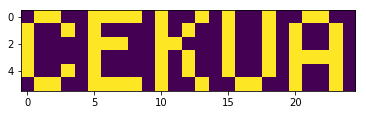

In [7]:
#Show image as I can't read 1 0 images very well
plt.imshow(image)
plt.show()